1. Взять датасет(приложен в материалах - DZ_2_9.csv) в котором представлены цены на однокомнатные квартиры и возраст этих квартир. Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?
2. Проведите кластеризацию с помощью алгоритма k-means. Какой алгоритм справился с задачей лучше?
3. ДОП: Проведите кластеризацию DBSCAN с параметрами по умолчанию. Сколько точек было размечено как выбросы? Попробовать подобрать eps и min_samples так, чтобы ушел хотя бы один выброс

In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Устанавливаем стиль визуализаций в matplotlib
%matplotlib inline
plt.style.use('seaborn')

from google.colab import drive
drive.mount('/content/drive')

<ipython-input-1-ec177e6a4f68>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Mounted at /content/drive


In [2]:
# загружаем данные
df = pd.read_csv('drive/MyDrive/DZ_2_9.csv')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


In [6]:
X = df[['year', 'price']]

# Импортируем модуль GaussianMixture из sklearn для работы с моделями гауссовой смеси
from sklearn.mixture import GaussianMixture

# Создаем модель гауссовой смеси с тремя компонентами (тремя кластерами)
# n_components=3 означает, что мы хотим разделить данные на три кластера
gm_clustering = GaussianMixture(n_components=3, random_state=42)

# Обучаем модель гауссовой смеси на данных X
# Метод fit подбирает параметры модели (средние значения, ковариационные матрицы и веса для каждого компонента)
gm_clustering.fit(X)

# Применяем обученную модель для предсказания, к какому кластеру принадлежат объекты в матрице X
# Метод predict возвращает метки кластеров для каждого объекта в данных X
gm_prediction = gm_clustering.predict(X)

<Axes: xlabel='year', ylabel='price'>

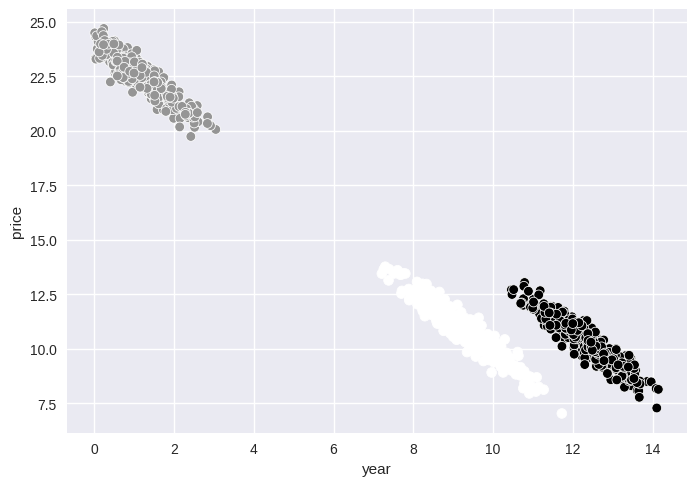

In [7]:
sns.scatterplot(x=df.year, y=df.price, c=gm_prediction)

<Axes: xlabel='year', ylabel='price'>

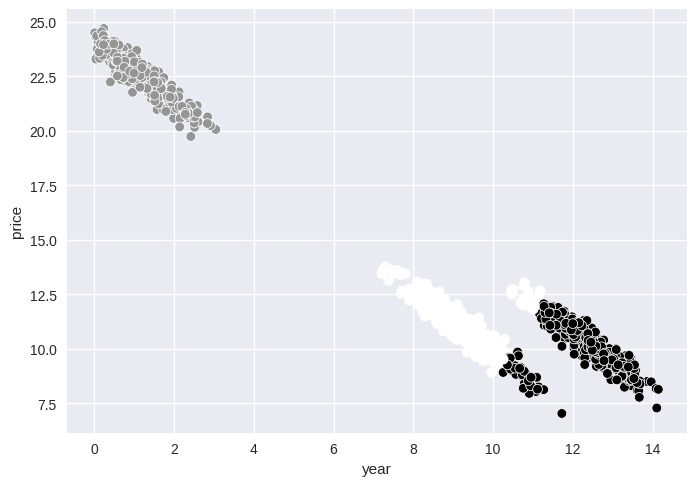

In [14]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=100, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_


#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам
sns.scatterplot(x=df.year, y=df.price, c=predictions)

Алгоритм GMM отлично справился со своей задачей и разделил данные на три кластера, которые получились однородными.

<Axes: xlabel='year', ylabel='price'>

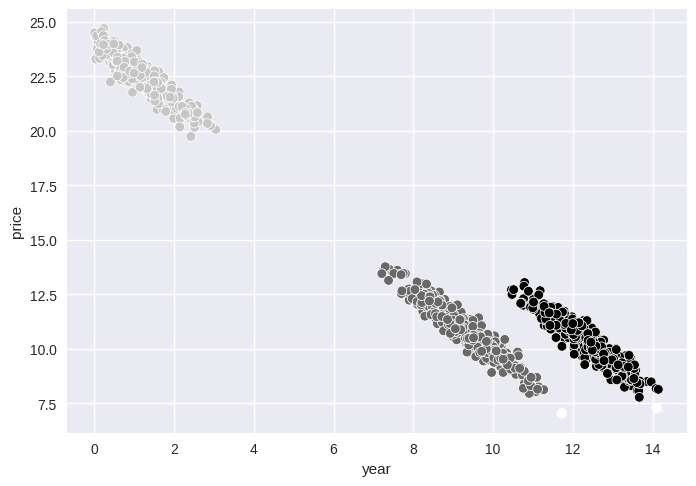

In [24]:
# Импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=0.5, min_samples=2).fit(df[['year', 'price']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.year, y=df.price, c=clustering.labels_)